<a href="https://colab.research.google.com/github/devitayolanda/Indonesian-Named-Entity-Recognition/blob/main/Kelompok_Kraken_NER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# "Indonesian Named Entity Recognition"

### Proyek PBA<br> Kelompok Kraken

Nama anggota:
1. 11S18028 | Naomi Tambunan
2. 11S18052 | Ester Gultom
3. 11S18054 | Cindi Simanihuruk
4. 11S18060 | Laura Sinaga
5. 11S18062 | Devita Tampubolon

### IMPORT LIBRARY
import-import yang ada pada 1 adalah library python yang bekerja dalam hal pengolahan data
sedangkan import yang ada pada 2 adalah library yang diatur dalam pengohan grafik dan visualisasi yang akan diterapkan sedikit pada kode program dibawah

In [ ]:
#1
import pandas as pd 
import numpy as np
import csv
import nltk
import tensorflow as tf

#2
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set(font_scale=1)
%matplotlib inline
from matplotlib import ticker
%config InlineBackend.figure_format = 'svg' 

### Pemanggilan/Membaca dataset
DIbawah ini merupakan kode program yang digunakan untuk membaca dan menampilkan secara garis besar dataset file singgalang.tsv yang akan digunakan pada proyek ini:

In [ ]:
df = pd.read_csv("SINGGALANG.tsv", header = None, delimiter="\t", quoting=csv.QUOTE_NONE, encoding='utf-8')
print(df)

                    0             1
0                  Ia             O
1            menjabat             O
2             sebagai             O
3            Presiden             O
4              ketiga             O
...               ...           ...
1478263            di             O
1478264      kalangan             O
1478265       pelajar             O
1478266  Muhammadiyah  Organisation
1478267             .             O

[1478268 rows x 2 columns]


#### ==
DIbawah ini merupakan kode program yang digunakan untuk membuka dan menampilkan secara garis besar dataset file singgalang.tsv yang akan digunakan pada proyek ini yang dengan menggunakan DataFrame. Dimana data frame ini merupakan struktur data 2 dimensi yang berbentuk tabular yaitu data yang akan mempunyai baris dan kolom. <br>
Dalam hal ini, kode program ini membantu dalam menampilkan dataset yang sudah tersusun rapi dengan nama kolom yang jelas dari dataset yang dimiliki.<br>
#### Note: Dataset.head(10)=hanya menampilan dataset berjumlah 10 saja sebagai sample

In [ ]:
list_kalimat = []
nomor_kalimat = 1

with open('SINGGALANG.tsv', encoding='UTF-8') as read_obj:
    csv_reader = csv.reader(read_obj, delimiter='\t', quotechar=None) 
    for row in csv_reader:
        if len(row) == 0:
            nomor_kalimat += 1 
        else:
            tmp_row= row
            tmp_row.append(nomor_kalimat)
            list_kalimat.append(tmp_row)

dataset = pd.DataFrame(list_kalimat, columns=['kata', 'entitas', 'jumlah'])

dataset.head(10)

,kata,entitas,jumlah
0,Ia,O,1
1,menjabat,O,1
2,sebagai,O,1
3,Presiden,O,1
4,ketiga,O,1
5,Mesir,Place,1
6,pada,O,1
7,periode,O,1
8,15,O,1
9,Oktober,O,1


In [ ]:
#Merupakan kode program yang digunakan dengan tujuan menampilkan sample dari data set yang terletak paling bawah
dataset.tail()

,kata,entitas,jumlah
1478263,di,O,48957
1478264,kalangan,O,48957
1478265,pelajar,O,48957
1478266,Muhammadiyah,Organisation,48957
1478267,.,O,48957


In [ ]:
#Merupakan kode program yang digunakan dengan tujuan untuk menampilkan informasi yang dimiliki oleh datast singgalang yang digunakan
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1478268 entries, 0 to 1478267
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   kata     1478268 non-null  object
 1   entitas  1478268 non-null  object
 2   jumlah   1478268 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 33.8+ MB


### EKSPLORASI DATA ANALYSIS
Berikut ini adalah kode program class yang berguna untuk melakukan pengambilan data pada dataset yang akan dijadikan kalimat.
Dengan class bernama gersentence agar dapat dilakukan pemanggilan pada kode program selanjutnya
#### Note: 
- Lambda = sebuah fungsi yang digunakan untuk mengembalikan nilai yang ada pada dataset singgalang. <br> 
- Self.grouped = digunakan untuk melakukan penjumlahan kata yang ada pada data set yang dimiliki. 

In [ ]:
class getsentence(object): 
    
    def __init__(self, data): 
      self.n_sent = 1.0
      self.dataset = dataset
      self.empty = False 
      
      agg_func = lambda s: [(t, e) for t, e in zip(s["kata"].values.tolist(),
                                                 s["entitas"].values.tolist())]                                           
      self.grouped = self.dataset.groupby("jumlah").apply(agg_func)
      self.sentences = [s for s in self.grouped]

In [ ]:
getter = getsentence(dataset)
kalimat = getter.sentences

print(kalimat[0])

[('Ia', 'O'), ('menjabat', 'O'), ('sebagai', 'O'), ('Presiden', 'O'), ('ketiga', 'O'), ('Mesir', 'Place'), ('pada', 'O'), ('periode', 'O'), ('15', 'O'), ('Oktober', 'O'), ('1970', 'O'), ('hingga', 'O'), ('terbunuhnya', 'O'), ('pada', 'O'), ('6', 'O'), ('Oktober', 'O'), ('1981', 'O'), ('.', 'O')]


#### ==
Berikut ini adalah kode program yang membaca,menghitung dan menampilkan kata terpanjang dan terpendek pada dataset SINGGALANG:

In [ ]:
longest_sen = max(kalimat, key=len)
longest_sen_len = len(longest_sen)

print (longest_sen_len)

490


In [ ]:
print (longest_sen)

[('Sejarah', 'O'), ('Asal', 'O'), ('Usul', 'O'), ('Desa', 'O'), ('ArjawinangunDiceritakan', 'O'), ('dalam', 'O'), ('alam', 'O'), ('pengembaraannya', 'O'), ('untuk', 'O'), ('mencari', 'O'), ('dan', 'O'), ('memperdalam', 'O'), ('agama', 'O'), ('islam', 'O'), (',', 'O'), ('dua', 'O'), ('orang', 'O'), ('Pajajaran', 'Place'), ('Raden', 'O'), ('Walangsungsng', 'O'), ('dan', 'O'), ('Adiknya', 'O'), ('Nyi', 'O'), ('Rarasantang', 'O'), (',', 'O'), ('sampai', 'O'), ('ke', 'O'), ('Mesir', 'Place'), ('menunaikan', 'O'), ('Ibadah', 'O'), ('Haji', 'O'), (',', 'O'), ('Raden', 'O'), ('Walangsungsang', 'O'), ('pulang', 'O'), ('ke', 'O'), ('Cirebon', 'Place'), ('dengan', 'O'), ('sebutan', 'O'), ('Haji', 'O'), ('Abdullah', 'Person'), ('Iman', 'O'), (',', 'O'), ('sedangkan', 'O'), ('adiknyaNyi', 'O'), ('Rarasantang', 'O'), ('tetap', 'O'), ('berada', 'O'), ('di', 'O'), ('Mesir', 'Place'), ('karena', 'O'), ('telah', 'O'), ('bersuami', 'O'), ('dengan', 'O'), ('Syarif', 'O'), ('Abdullah', 'Person'), ('seorang

In [ ]:
shortest_sen = min(kalimat, key=len)
shortest_sen_len = len(shortest_sen)

print (shortest_sen_len)

2


In [ ]:
print (shortest_sen)

[('III/S', 'O'), ('.', 'O')]


#### ==
Berikut ini adalah kode program yang akan menampilkan informasi yang dimiliki pada data set yang menunjukkan jumlah daru kalimat yang dimiliki , kata unik jumlah dan apa-apa saja entitas yang ada pada data set singgalang tersebut:

In [ ]:
print("Jumlah kalimat pada dateset: ", len(dataset.groupby(['jumlah'])))
words = list(set(dataset["kata"].values))
n_words = len(words)
print("Jumlah kata unik : ", n_words)
tags = list(set(dataset["entitas"].values))
print("Entitas yang ada pada dataset:", tags)
n_tags = len(tags)
print("Jumlah entitas: ", n_tags)

Jumlah kalimat pada dateset:  48957
Jumlah kata unik :  100839
Entitas yang ada pada dataset: ['Place', 'O', 'Organisation', 'Person']
Jumlah entitas:  4


### Tagging
Berikut ini adalah kode program yang menunjukkan beberapa sample data yang ada pada dataset yang memiliki entitas sejenis yang dimiliki dataset singgalang. Dimana kita ketahui bahwa dataset singgalang memiliki 4 entitas yaitu, place, O, organisation dan person. 
Kode program dibawah akan menampilkan sample kata yang berentitas sejenis lengkap dengan urutan no berapa kata tersebut ada di dalam dataset singgalang:

In [ ]:
#Entitas place
dataset.loc[dataset['entitas'] == 'Place', 'kata'].head()

5        Mesir
29       Mesir
47       Mesir
68    Kerajaan
70       Kairo
Name: kata, dtype: object

In [ ]:
#Jumlah kata yang berentitas place
dataset.iloc[112921] 

kata       Nama
entitas       O
jumlah     3704
Name: 112921, dtype: object

In [ ]:
#Entitas person
dataset.loc[dataset['entitas'] == 'Person', 'kata'].head()

38     Sadat
100    Anwar
101    Sadat
105    Hafez
107    Assad
Name: kata, dtype: object

In [ ]:
#Entitas organisation
dataset.loc[dataset['entitas'] == 'Organisation', 'kata'].head()

568    Universitas
569      Indonesia
711     Independen
778    Universitas
779         Gadjah
Name: kata, dtype: object

In [ ]:
#Entitas O
dataset.loc[dataset['entitas'] == 'O', 'kata'].head()

0          Ia
1    menjabat
2     sebagai
3    Presiden
4      ketiga
Name: kata, dtype: object

In [ ]:
#Menampilkan jumlah keseluruhan dengan dikelompokkan sesuai dengan jenis entitas yang ada
dataframe = dataset.groupby("entitas" )
dataframe["entitas"].count()

entitas
O               1340023
Organisation      14770
Person            41297
Place             82178
Name: entitas, dtype: int64

### ==
Berikut ini adalah salah contoh kode program yang digunakan untuk memvisualisasikan dataset yang digunakan pada proyek ini. Visualisasi yang digunakan pada kode program dibawah adalah visualisasi jumlah persentase kata yang ada pada dataset dengan jenis entitas yang dimiliki pada dataset singgalang. 

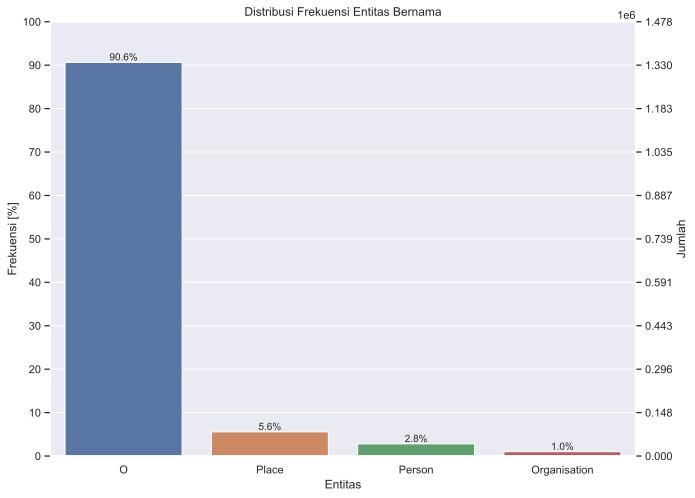

In [ ]:
ncount = len(dataset)

plt.figure(figsize=(10.5, 8))
ax = sns.countplot(x = "entitas", data = dataset)
plt.title('Distribusi Frekuensi Entitas Bernama')
plt.xlabel('Entitas')

ax2 = ax.twinx()
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Jumlah')
ax2.set_ylabel('Frekuensi [%]')

for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1, 1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha = 'center', va = 'bottom')

ax.yaxis.set_major_locator(ticker.LinearLocator(11))
ax2.set_ylim(0, 100)
ax.set_ylim(0, ncount)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax2.grid(None)

#### ==
Berikut ini adalah kode program yang menampilkan beberapa sample data yang berhasil dilakukan tokenisasi dan menampilkan jumlah dari data yang dimiliki tersebut: 

In [ ]:
 dataset['kata'].value_counts()[:10]

,         88144
.         49109
dan       37283
di        33701
yang      29353
-LRB-     19843
-RRB-     19736
''        15906
``        15232
dengan    15231
Name: kata, dtype: int64

In [ ]:
import re 
 
def Find(string): 
    regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
    url = re.findall(regex,string)       
    return [x[0] for x in url] 
      
dataset_url = open('SINGGALANG.tsv', encoding="utf8").read()
print("Urls: ", Find(dataset_url)) 

Urls:  ['www.ultimatejlo.com', 'http://karyatani.webs.com', 'www.4icu.org/id/', 'http://www.cousteau.org', 'http://www.unigha.ac.id', 'http://www.garukgak.co.cc/', 'https://groups.yahoo.com/neo/groups/Dharmajala/conversations/topics/7355', 'www.lentera.org', 'www.beritasatu.tv', 'www.beritasatu.com', 'http://informasijambi.blogspot.co.id/2010/03/riwayat-hidup-h-zulkifli-nurdin.html', 'www.akuntansi.usm.ac.id', 'http://raisa.flagig.com', 'www.geocities.com/smanegeri3palembang']


#### PUNCTUATION
punctuation pada python adalah proses yang diterapkan pada NLP bahkan NER yang bertujuan untuk menghilangkan/mengganti tanda baca yang tidak sesuai yang diinginkan. <br>
Berikut ini adalah beberapa contoh yang menerapkan punctuation pada dataset singgalang:

In [ ]:
dataset_punct = open('SINGGALANG.tsv', encoding="utf8").read()
dataset_punct  = dataset_punct.replace("--", " ")

for symbol in "-'":
   dataset_punct  = dataset_punct.replace(symbol + " ", "")
   dataset_punct  = dataset_punct.replace(" " + symbol, "")

for symbol in ".,/'-":
    print (symbol, dataset_punct.count(symbol)) 

. 57483
, 89240
/ 3462
' 33811
- 96947


## TEXT PREPROCESSING
Tahapan ini merupakan tahapan dimana akan dilakukan perbaikan sedikit atau kata lain memperbaiki dat yang diperlukan pada proses NER yang dilakukan.
beberapa hal yang dilakukan pada proses ini adalah perbaikan tanda baca, menyamakan jenis kata (menghilangkan huruf kapital)

In [ ]:
dataset_prep = pd.DataFrame(list_kalimat, columns=['kata', 'entitas', 'jumlah'])

In [ ]:
def perbaikan_format_tanda_baca(dataset_prep):    
    for i in dataset_prep.index:
        token = re.sub('([.,!?()])', r'\1 ', dataset_prep.at[i, 'kata'])
        dataset_prep.at[i, 'kata'] = re.sub('\s{2,}', ' ', token)
    return dataset_prep
perbaikan_format_tanda_baca(dataset_prep)

,kata,entitas,jumlah
0,Ia,O,1
1,menjabat,O,1
2,sebagai,O,1
3,Presiden,O,1
4,ketiga,O,1
...,...,...,...
1478263,di,O,48957
1478264,kalangan,O,48957
1478265,pelajar,O,48957
1478266,Muhammadiyah,Organisation,48957


In [ ]:
# Digunakan untuk Mengubah upper case menjadi lower case
dataset_prep["kata"] = dataset_prep["kata"].str.lower()
dataset_prep.head() 

,kata,entitas,jumlah
0,ia,O,1
1,menjabat,O,1
2,sebagai,O,1
3,presiden,O,1
4,ketiga,O,1


In [ ]:
def word2features(sent, i):
    word = sent[i][0]
    postag = sent[i][1]
    features = [
        'bias',
        'word.lower=' + word.lower(),
        'word[-3:]=' + word[-3:],
        'word[-2:]=' + word[-2:],
        'word.isupper=%s' % word.isupper(),
        'word.istitle=%s' % word.istitle(),
        'word.isdigit=%s' % word.isdigit(),
        'postag=' + postag,
        'postag[:2]=' + postag[:2],
    ]
    if i > 0:
        word1 = sent[i-1][0]
        postag1 = sent[i-1][1]
        features.extend([
            '-1:word.lower=' + word1.lower(),
            '-1:word.istitle=%s' % word1.istitle(),
            '-1:word.isupper=%s' % word1.isupper(),
            '-1:postag=' + postag1,
            '-1:postag[:2]=' + postag1[:2],
        ])
    else:
        features.append('BOS')
        
    if i < len(sent)-1:
        word1 = sent[i+1][0]
        postag1 = sent[i+1][1]
        features.extend([
            '+1:word.lower=' + word1.lower(),
            '+1:word.istitle=%s' % word1.istitle(),
            '+1:word.isupper=%s' % word1.isupper(),
            '+1:postag=' + postag1,
            '+1:postag[:2]=' + postag1[:2],
        ])
    else:
        features.append('EOS')
                
    return features


def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent))]

def sent2labels(sent):
    return [label for token, postag, label in sent]

def sent2tokens(sent):
    return [token for token, postag, label in sent] 

## MODELLING DATA

Kode program dibawah ini merupakan kode program yang merupakan penerapan dari proses pemodelan klasifikasi yang dimanfaatkan pada kode program evaluasi yang akan dibentuk. <br>
Klasifikasi yang digunakan disini adalah Random Forest classifier, dimana klasifier ini akan melakukan mapping/pemetaan dari kumpulan data terstruktur dan akan melakukan klasifikasi yang baik pada proses pemodelan yang dilakukan

In [ ]:
def feature_map(word):
    return np.array([word.istitle(), word.islower(), word.isupper(), len(word),
                     word.isdigit(),  word.isalpha()])

In [ ]:
words = [feature_map(w) for w in dataset["kata"].values.tolist()]
tags = dataset["entitas"].values.tolist()

In [ ]:
print(words[:10])

[array([1, 0, 0, 2, 0, 1]), array([0, 1, 0, 8, 0, 1]), array([0, 1, 0, 7, 0, 1]), array([1, 0, 0, 8, 0, 1]), array([0, 1, 0, 6, 0, 1]), array([1, 0, 0, 5, 0, 1]), array([0, 1, 0, 4, 0, 1]), array([0, 1, 0, 7, 0, 1]), array([0, 0, 0, 2, 1, 0]), array([1, 0, 0, 7, 0, 1])]


In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import scipy.stats

In [ ]:
pred = cross_val_predict(RandomForestClassifier(n_estimators=20),X=words, y=tags, cv=5)

## EVALUASI MODEL

Berikut ini adalah evaluasi model yang dihasilkan dari proses preprosesing hingga pemodelan yang sudah dilakukan sebelumnya. Evaluasi model yang dilakukan menggunakan confussion matriks dimana, confusion matriks adalah salah satu tools analitik prediktif yang menampilkan dan membandingkan nilai aktual atau nilai sebenarnya dengan nilai hasil prediksi model yang dapat digunakan untuk menghasilkan metrik evaluasi seperti Accuracy (akurasi), Precision, Recall, dan F1-Score atau F-Measure

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_pred=pred, y_true=tags)
print(report)

c:\users\win_10\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\win_10\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           O       0.91      0.99      0.95   1340023
Organisation       0.00      0.00      0.00     14770
      Person       0.00      0.00      0.00     41297
       Place       0.43      0.11      0.17     82178

    accuracy                           0.91   1478268
   macro avg       0.34      0.28      0.28   1478268
weighted avg       0.85      0.91      0.87   1478268



c:\users\win_10\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
